In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_up_BTC3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BTC,up,2018-12-20 17:00:00,ESPACIOBITVE,0,0,#Criptomonedas #Bitcoin #Bitcoin #BTC #BTC #Ma...,Compradores tradicionales cambian los mercado ...
1,BTC,up,2018-12-20 17:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $4,182.53, mar..."
2,BTC,up,2018-12-20 17:00:00,truxgo,0,0,#haloce #server #bitcoin #bitcoin #paypal #pay...,get a #haloce #server = 4 users for 2 usd #bit...
3,BTC,up,2018-12-20 17:00:00,es_tradingview,0,0,#BTCUSD,#BTCUSD - Siguiendo al Rey de Reyes [BITCOIN H...
4,BTC,up,2018-12-20 17:00:00,matthewhughes,0,1,NaN,If i withdrew my all my cash in December and t...
...,...,...,...,...,...,...,...,...
7482,BTC,up,2018-12-20 22:59:39,Krudmart,0,0,NaN,I liked a @YouTube video http://youtu.be/4kfyq...
7483,BTC,up,2018-12-20 22:59:43,cryptow1re,0,0,NaN,reddit : Has Bitcoin Found a Bottom? BTC Surge...
7484,BTC,up,2018-12-20 22:59:49,derose,0,1,NaN,That Bitcoin zealots are turning this into a f...
7485,BTC,up,2018-12-20 22:59:54,CeciliaGlennon,0,9,NaN,It's almost like they want us to use bitcoin.


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0       [compradores, tradicionales, cambian, los, mer...
1       [@, 1, ,, bitcoin, with, unit, price, of, $, 4...
2       [get, a, haloce, server, =, 4, users, for, 2, ...
3       [btcusd, siguiendo, al, rey, de, reyes, [, bit...
4       [if, i, withdrew, my, all, my, cash, in, decem...
                              ...                        
7482    [i, liked, a, @, youtube, video, 4kfyqvzckle, ...
7483    [reddit, :, has, bitcoin, found, a, bottom, ?,...
7484    [that, bitcoin, zealots, are, turning, this, i...
7485    [it, 's, almost, like, they, want, us, to, use...
7486    [coinbase, ’, s, new, coin, to, coin, model, :...
Name: text, Length: 7487, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0       [compradores, tradicionales, cambian, los, mer...
1       [,, bitcoin, unit, price, $, ,, market, cap, $...
2       [get, haloce, server, =, users, usd, bitcoin, ...
3       [btcusd, siguiendo, al, rey, reyes, [, bitcoin...
4       [withdrew, cash, december, burned, half, ,, be...
                              ...                        
7482    [liked, @, youtube, video, ?, bitcoin, :, asce...
7483    [reddit, :, bitcoin, found, bottom, ?, btc, su...
7484    [bitcoin, zealots, turning, flat, earth, movem...
7485                          ['s, want, use, bitcoin, .]
7486    [’, new, coin, coin, model, :, better, direct,...
Name: text, Length: 7487, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
# text['text'] =  text['text'].apply(lambda x : [re.sub('[^a-zA-Z0-9]',' ',word).strip() for word in x])

In [19]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [22]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [23]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [24]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [25]:
word2id = defaultdict(lambda: 0)

In [26]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [27]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [28]:
len(tf_idf_result)

12191

In [29]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

12191


In [30]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

12191

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

12191

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

218.86307104967793

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0022545834587529567

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.13030391017799633

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
13,"[-0.21396437287330627, -0.37742382287979126, -...",price,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.011387,0.076042,0.935345,NaN
26,"[-0.2389836609363556, -0.3092453181743622, -0....",cash,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.001819,0.045099,0.956720,NaN
36,"[-0.20213516056537628, -0.10868209600448608, -...",hour,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.005410,0.024875,0.980534,NaN
3305,"[-0.1887095421552658, -0.18970751762390137, -0...",fast,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.001503,0.011932,0.989571,NaN
8368,"[-0.1273692101240158, -0.10572303086519241, -0...",mode,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.004103,0.009000,0.995104,NaN
190,"[-0.18589898943901062, -0.255680650472641, -0....",analysis,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.016112,0.019516,0.996596,NaN
1590,"[-0.12167706340551376, -0.06689603626728058, -...",node,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.009430,0.010618,0.998813,NaN
3927,"[-0.1566932499408722, -0.06869601458311081, -0...",sync,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.010901,0.010415,1.000485,NaN
8367,"[-0.15164384245872498, -0.05874210223555565, -...",bchd,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.010018,0.009404,1.000613,NaN
1551,"[-0.04047497361898422, -0.0782197043299675, -0...",jump,0,"[-0.012106492, -0.013233121, -0.009448825, -0....",0.006297,0.003843,1.002455,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5,"[-0.4000319838523865, -0.7697064876556396, -0....",bitcoin,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.003439,0.918773,0.084666,NaN
37,"[-0.6063927412033081, -0.967485785484314, -0.0...",crypto,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.025173,0.233081,0.792092,NaN
33,"[-0.4262818694114685, -0.7228861451148987, -0....",cryptocurrency,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.010849,0.129130,0.881719,NaN
66,"[-0.5087617635726929, -0.8342477083206177, -0....",blockchain,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.011620,0.128017,0.883603,NaN
81,"[-0.40604203939437866, -0.6634628176689148, -0...",ethereum,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.017926,0.097479,0.920447,NaN
14,"[-0.27512842416763306, -0.6031069755554199, -0...",market,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.002253,0.053290,0.948963,NaN
78,"[-0.5100669264793396, -0.8327651023864746, -0....",news,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.019532,0.065222,0.954310,NaN
137,"[-0.3054020404815674, -0.5894057750701904, -0....",trade,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.008738,0.054200,0.954538,NaN
84,"[-0.20061643421649933, -0.5637326836585999, -0...",free,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.000197,0.029527,0.970670,NaN
43,"[-0.2244606465101242, -0.524509072303772, -0.2...",time,1,"[-0.011263815, -0.030532831, -0.0092370855, -0...",0.001572,0.028516,0.973057,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5668,"[-0.0015063745668157935, 0.001825470826588571,...",micro,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.091608,0.000101,1.091507,NaN
3296,"[0.006975188385695219, 0.0015707133570685983, ...",atteinte,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.111454,0.000202,1.111251,NaN
2953,"[-0.002989641623571515, 0.0035535802599042654,...",xblock,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.113895,0.000404,1.113491,NaN
10963,"[0.004303367342799902, 0.009522944688796997, 9...",bestgiftever,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.147336,0.000101,1.147235,NaN
4266,"[-0.0008392436429858208, 0.0038395037408918142...",mc_vaka,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.148355,0.000101,1.148254,NaN
3947,"[-0.003178174840286374, 0.0053306883201003075,...",tease,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.165401,0.000101,1.165300,NaN
1262,"[0.005735194310545921, 0.003405826399102807, 0...",digitalgold,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.183601,0.000101,1.183500,NaN
2981,"[-0.003539395984262228, 0.0017470965394750237,...",impuestos,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.206120,0.000101,1.206019,NaN
3321,"[-0.0020321777556091547, -0.001623321557417512...",brighten,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.213896,0.000303,1.213593,NaN
2784,"[0.0006488023791462183, 0.005921933799982071, ...",gtducw,2,"[0.00011758544, 0.0016632085, 0.00070231274, 0...",0.226826,0.000101,1.226725,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
443,"[0.8971088528633118, -1.063117504119873, -0.60...",sell,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.000168,0.048841,0.951328,NaN
2889,"[1.2785409688949585, -1.2813717126846313, -0.7...",ratio,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.005478,0.023662,0.981816,NaN
1109,"[0.3874206244945526, -0.4836282730102539, -0.2...",bitfinex,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.000098,0.008899,0.991199,NaN
1425,"[0.5101797580718994, -0.5956288576126099, -0.3...",hitbtc,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.000397,0.008696,0.991700,NaN
2891,"[0.4144373834133148, -0.41902831196784973, -0....",arbitrage,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.002794,0.007584,0.995210,NaN
2893,"[0.25695163011550903, -0.2664121091365814, -0....",arbingtool,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.002325,0.006876,0.995449,NaN
2896,"[0.2094079852104187, -0.25143423676490784, -0....",kucoin,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.000132,0.003539,0.996592,NaN
158,"[0.19357989728450775, -0.22521375119686127, -0...",date,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.001977,0.005157,0.996820,NaN
175,"[0.22099804878234863, -0.29705119132995605, -0...",bittrex,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.003794,0.006371,0.997423,NaN
2892,"[0.36212462186813354, -0.36279311776161194, -0...",arbitraj,3,"[0.060746077, -0.07457157, -0.040997714, -0.13...",0.006425,0.006876,0.999549,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

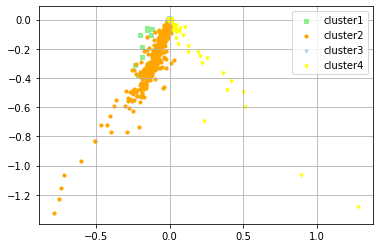

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 기타

152

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

11831

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소

99

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소

109

In [63]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 13 # 기타

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 12 # 거래소

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소

In [69]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [71]:
kmeans.inertia_

760.8236083984375

In [72]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 0 0 ... 2 2 2]


In [73]:
cluster_values= list(model.wv.vocab)

In [74]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-760.8236694335938


In [75]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [76]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7489016


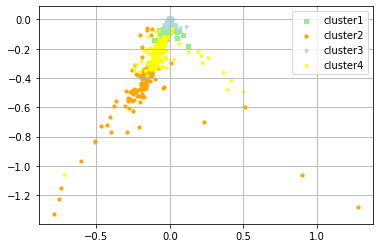

In [77]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [78]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [79]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [80]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [81]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [82]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [83]:
import scipy.spatial.distance as dist

In [84]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [85]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6671,"[-0.027012309059500694, -0.0731973648071289, -...",regulatory,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.028201,0.001112,1.027089,NaN
2508,"[-0.024313094094395638, -0.07695042341947556, ...",tecnología,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.029896,0.001112,1.028784,NaN
1925,"[-0.02222469449043274, -0.0708630383014679, -0...",recupera,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.030721,0.000809,1.029913,NaN
3422,"[-0.03174122795462608, -0.0761701688170433, -0...",portfolio,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.031416,0.001315,1.030101,NaN
4834,"[-0.02000908926129341, -0.07267820835113525, -...",uzun,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.031220,0.000708,1.030512,NaN
9943,"[-0.022338340058922768, -0.07862326502799988, ...",asia,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.031998,0.000607,1.031391,NaN
1484,"[-0.021762000396847725, -0.07323083281517029, ...",american,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.032459,0.001011,1.031448,NaN
2416,"[-0.024722009897232056, -0.0814061164855957, -...",shit,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.033446,0.001719,1.031727,NaN
2269,"[-0.02433926612138748, -0.07287987321615219, -...",extradite,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.033223,0.000809,1.032414,NaN
383,"[-0.023303622379899025, -0.08346280455589294, ...",cartera,0,"[-0.026860172, -0.077055536, -0.02375615, -0.1...",0.033473,0.000910,1.032563,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
82,"[-0.19098414480686188, -0.45254260301589966, -...",bank,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.137754,0.011022,1.126732,NaN
849,"[-0.17788732051849365, -0.44037801027297974, -...",take,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.227804,0.013146,1.214658,NaN
950,"[-0.23084656894207, -0.49878421425819397, -0.1...",security,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.246358,0.012741,1.233617,NaN
279,"[-0.20180167257785797, -0.4779358506202698, -0...",world,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.262544,0.013449,1.249095,NaN
767,"[-0.16255883872509003, -0.44130533933639526, -...",come,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.299200,0.010719,1.288481,NaN
32,"[-0.16793620586395264, -0.4250757098197937, -0...",today,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.313959,0.013550,1.300409,NaN
922,"[-0.13711170852184296, -0.4173933267593384, -0...",como,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.316086,0.008899,1.307187,NaN
335,"[-0.22540049254894257, -0.4825130105018616, -0...",bitcoins,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.321175,0.012337,1.308839,NaN
30,"[-0.19550903141498566, -0.4835917055606842, -0...",good,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.340709,0.014258,1.326451,NaN
942,"[-0.16441000998020172, -0.44734710454940796, -...",work,1,"[-0.17859828, -0.4672699, -0.1392387, -0.74390...",0.347924,0.010921,1.337003,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10547,"[-0.0037444457411766052, -0.014728873036801815...",shell,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.024442,0.000101,1.024341,NaN
10312,"[-0.005006958264857531, -0.013624344021081924,...",añade,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.025433,0.000101,1.025332,NaN
12149,"[-0.007925326935946941, -0.01325292605906725, ...",doch,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.025446,0.000101,1.025345,NaN
10793,"[-0.003005084116011858, -0.018723592162132263,...",jamas,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.025692,0.000101,1.025590,NaN
9582,"[-0.0052038878202438354, -0.01657194271683693,...",parle,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.025881,0.000101,1.025780,NaN
11121,"[-0.009723996743559837, -0.014565249904990196,...",debitcards,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.026244,0.000101,1.026142,NaN
3412,"[-0.002782262396067381, -0.016114935278892517,...",treasure,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.026452,0.000202,1.026250,NaN
9255,"[-8.047049050219357e-06, -0.01653301529586315,...",felices,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.026378,0.000101,1.026277,NaN
7155,"[-0.0008144760504364967, -0.015895811840891838...",viel,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.026454,0.000101,1.026353,NaN
12087,"[-0.006876116618514061, -0.014927146956324577,...",campaign=social,2,"[-0.004816696, -0.014097251, -0.004440579, -0....",0.026686,0.000303,1.026382,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
548,"[-0.08105231821537018, -0.21303609013557434, -...",solution,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.050981,0.003135,1.047846,NaN
2234,"[-0.07524852454662323, -0.21970969438552856, -...",community,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.056933,0.004247,1.052686,NaN
2389,"[-0.06943559646606445, -0.21779653429985046, -...",hold,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.068822,0.004550,1.064272,NaN
266,"[-0.06753814220428467, -0.20813849568367004, -...",believe,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.071022,0.004550,1.066471,NaN
779,"[-0.07966277003288269, -0.21067745983600616, -...",publish,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.070904,0.004146,1.066759,NaN
547,"[-0.07577860355377197, -0.19926832616329193, -...",offer,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.071503,0.004247,1.067256,NaN
612,"[-0.07280150055885315, -0.2009868621826172, -0...",include,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.077651,0.003236,1.074415,NaN
790,"[-0.09613586217164993, -0.21865345537662506, -...",bring,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.078574,0.003741,1.074833,NaN
463,"[-0.07929521799087524, -0.2220122069120407, -0...",address,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.086266,0.007078,1.079187,NaN
1112,"[-0.07520760595798492, -0.2052234709262848, -0...",continue,3,"[-0.070237845, -0.21699248, -0.067714706, -0.3...",0.086180,0.003741,1.082439,NaN


In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 인플

1221

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 비즈

121

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 이슈

10516

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 제도

333

In [94]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 10 # 제도

In [99]:
temp_cluster_result1['Silhouette'] = 0.6805197
temp_cluster_result['Silhouette'] = 0.6805197
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [100]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BTC3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BTC3_cosine")